# Investigate Texas Death Row Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset documents 553 Texas death row inmates executed from 1976, when the Supreme Court reinstated the death penalty, to the present. Originally from the Texas Department of Criminal Justice website was cleaned and provided by selectstarsql https://selectstarsql.com.

In [1]:
# import statements for all of the packages that I plan to use. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties
Below are the questions to answer using pandas to explore ```tx_deathrow_full.csv``` and have a holistic understanding of the data set:

- Number of samples & columns in the dataset
- Duplicate rows in the dataset
- Datatypes of the columns
- Features with missing values
- Number of unique values for the dataset
- Number of rows with missing values in the dataset
- Descriptive statistics for the dataset

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
executions_df = pd.read_csv('tx_deathrow_full.csv')
executions_df.head(3)

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ Number,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,2018-05-16,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...


#### Number of samples & columns in the dataset
Based on the result shown below, there are a total of 533 executions and 18 columns in the dataset.

In [3]:
# To check the size of the dataset
executions_df.shape

(553, 18)

#### Duplicate rows in the dataset
Based on the result shown below, there are no duplicated row.

In [4]:
# To get the total number of duplicated rows in the dataset 
executions_df.duplicated().sum()

0

#### Datatype of column in the dataset
```info``` is use to find the basic information like datatype of column in the dataset. Noticed that a number of columns name and columns not using the correct datatype and I will work on it in the next section.

In [5]:
executions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 18 columns):
Execution                  553 non-null int64
Date of Birth              539 non-null object
Date of Offence            536 non-null object
Highest Education Level    505 non-null float64
Last Name                  553 non-null object
First Name                 553 non-null object
TDCJ
Number                553 non-null int64
Age at Execution           553 non-null int64
Date Received              539 non-null object
Execution Date             553 non-null object
Race                       553 non-null object
County                     553 non-null object
Eye Color                  518 non-null object
Weight                     511 non-null float64
Height                     513 non-null object
Native County              510 non-null object
Native State               524 non-null object
Last Statement             443 non-null object
dtypes: float64(2), int64(3), object(13)
memory us

#### Features with missing values in the dataset
There are a number of null values in the dataset for these columns: ```Date of Birth```, ```Date of Offence```, ```Highest Education Level```, ```Date Received```, ```Eye Color```, ```Weight```, ```Height```, ```Native County```, ```Native State``` and ```Last Statement```.

In [6]:
executions_df.isnull().sum()

Execution                    0
Date of Birth               14
Date of Offence             17
Highest Education Level     48
Last Name                    0
First Name                   0
TDCJ\nNumber                 0
Age at Execution             0
Date Received               14
Execution Date               0
Race                         0
County                       0
Eye Color                   35
Weight                      42
Height                      40
Native County               43
Native State                29
Last Statement             110
dtype: int64

#### Number of unique values for the dataset
To see the total number of unique values for each column.

In [7]:
executions_df.nunique()

Execution                  553
Date of Birth              526
Date of Offence            507
Highest Education Level     17
Last Name                  450
First Name                 271
TDCJ\nNumber               553
Age at Execution            42
Date Received              513
Execution Date             550
Race                         5
County                      92
Eye Color                    8
Weight                     131
Height                      17
Native County              218
Native State                51
Last Statement             443
dtype: int64

#### Number of rows with missing values in the dataset
To check the total number of rows with at least one column with missing values. 

In [8]:
executions_df.isnull().any(axis=1).sum()

165

#### Descriptive statistics for the dataset
Based on the table shown below, we can observed that the youngest execution is at the age of 24 and olderest is at 67. The Highest education level is 20 and lowest is 3.

In [9]:
executions_df.describe()

,Execution,Highest Education Level,TDCJ Number,Age at Execution,Weight
count,553.000000,505.000000,553.000000,553.000000,511.000000
mean,277.000000,10.208911,524395.757685,39.470163,175.982387
std,159.781622,2.095540,499085.607027,8.628164,32.896476
min,1.000000,3.000000,511.000000,24.000000,104.000000
25%,139.000000,9.000000,815.000000,33.000000,151.000000
50%,277.000000,10.000000,999023.000000,38.000000,170.000000
75%,415.000000,12.000000,999257.000000,44.000000,191.500000
max,553.000000,20.000000,999555.000000,67.000000,318.000000


### Data Cleaning
After the above discussion on the structure of the dataset and the problems that need to be cleaned, the following are the cleaning steps to be performed:

1. Rename Columns
2. Drop Extraneous Columns
3. Mark zero values with NaN
5. Convert columns to correct datatype

#### Rename Columns
Rename all column labels to replace spaces with underscores and convert everything to lowercase.

In [10]:
executions_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
executions_df.head(1)

,execution,date_of_birth,date_of_offence,highest_education_level,last_name,first_name,tdcj number,age_at_execution,date_received,execution_date,race,county,eye_color,weight,height,native_county,native_state,last_statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...


#### Drop Extraneous Columns
- Drop columns that aren't relevant to what we want to explore on. Columns to drop: ```Execution```and ```TDCJ Number```.

In [11]:
# drop columns from the dataset
executions_df.drop(['execution','tdcj\nnumber'], axis=1, inplace=True)

# confirm changes
executions_df.head(1)

,date_of_birth,date_of_offence,highest_education_level,last_name,first_name,age_at_execution,date_received,execution_date,race,county,eye_color,weight,height,native_county,native_state,last_statement
0,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...


#### Convert Date Columns to Datetime datatype

- To convert ```date_of_birth```, ```date_of_offence ```, ```date_received```and ```execution_date ``` into Date datatype

In [12]:
# convert date columns to datetime format
executions_df['date_of_birth'] = pd.to_datetime(executions_df['date_of_birth'])
executions_df['date_of_offence'] = pd.to_datetime(executions_df['date_of_offence'])
executions_df['date_received'] = pd.to_datetime(executions_df['date_received'])
executions_df['execution_date'] = pd.to_datetime(executions_df['execution_date'])

# confirm the changes
executions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 16 columns):
date_of_birth              539 non-null datetime64[ns]
date_of_offence            536 non-null datetime64[ns]
highest_education_level    505 non-null float64
last_name                  553 non-null object
first_name                 553 non-null object
age_at_execution           553 non-null int64
date_received              539 non-null datetime64[ns]
execution_date             553 non-null datetime64[ns]
race                       553 non-null object
county                     553 non-null object
eye_color                  518 non-null object
weight                     511 non-null float64
height                     513 non-null object
native_county              510 non-null object
native_state               524 non-null object
last_statement             443 non-null object
dtypes: datetime64[ns](4), float64(2), int64(1), object(9)
memory usage: 69.2+ KB


### Exploratory Data Analysis

Now that I've trimmed and cleaned the data, I can compute statistics and create visualizations with the goal of addressing the research questions that I have posed in the Introduction section.

In [14]:
executions_df['age_at_execution'].describe()

count    553.000000
mean      39.470163
std        8.628164
min       24.000000
25%       33.000000
50%       38.000000
75%       44.000000
max       67.000000
Name: age_at_execution, dtype: float64

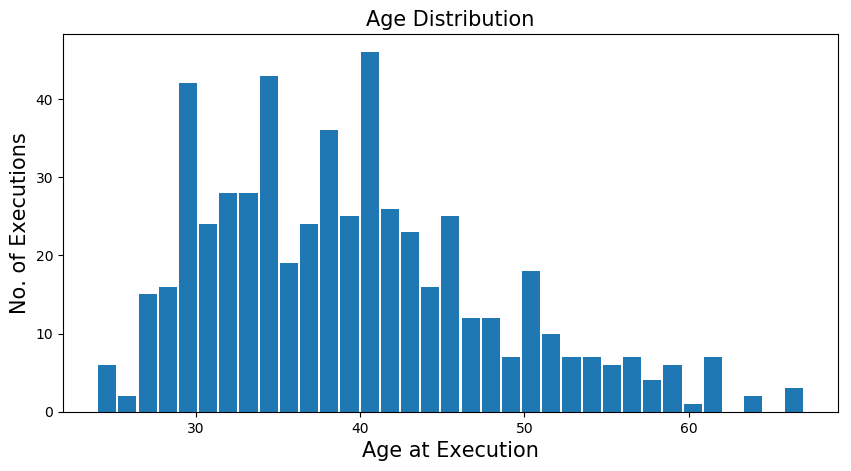

In [13]:
# Create histogram to see the distribution of the runtime 
plt.figure(figsize=(10,5), dpi = 100)

# x-axis 
plt.xlabel('Age at Execution', fontsize = 15)
# y-axis 
plt.ylabel('No. of Executions', fontsize=15)
# Name of the graph
plt.title('Age Distribution', fontsize=15)

# Plot the histogram
plt.hist(executions_df['age_at_execution'], rwidth = 0.9, bins =35)
# Displays the plot
plt.show()